# House price comparison = IRL, UK & PL

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


### IRL

In [2]:
# loading the house data set - Ireland
import csv

In [3]:
# specifing the path to a CSV file
csv_file = 'C:\\ESTERA\\CA2\\data sets - IRL\\house_price_IRL.csv'

# opening the file
with open(csv_file, mode='r') as file:
    # create a CSV reader object
    csv_reader = csv.reader(file)

    # reading  data into a list of lists
    data = [row for row in csv_reader]

# creating a DataFrame from the data
df_house_irl = pd.DataFrame(data[1:], columns=data[0])

# https://www.geeksforgeeks.org/reading-csv-files-in-python/

In [4]:
# checking how data looks
df_house_irl.head()

,Year,Banks and Building Societies (?),Local Authorities (?),Banks and Building Societies (?),Local Authorities (?)
0,1999,"147,303","91,657","192,587","113,819"
1,2000,"166,648","112,791","219,460","126,195"
2,2001,"181,934","122,163","254,556","134,535"
3,2002,"195,801","127,215","259,939","168,771"
4,2003,"221,602","135,615","304,696","158,345"


In [5]:
# selecting only first and second columns
df_house_irl = df_house_irl.iloc[:, [0, 1]].copy()
df_house_irl

,Year,Banks and Building Societies (?)
0,1999,"147,303"
1,2000,"166,648"
2,2001,"181,934"
3,2002,"195,801"
4,2003,"221,602"
5,2004,"245,468"
6,2005,"272,679"
7,2006,"298,342"
8,2007,"321,379"
9,2008,"305,148"


In [6]:
# renaming columns
df_house_irl.columns = ['Year', 'Price_IRL']

In [7]:
# checking columns type
df_house_irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Year       17 non-null     object
 1   Price_IRL  17 non-null     object
dtypes: object(2)
memory usage: 400.0+ bytes


In [8]:
# changing columns types to int
df_house_irl['Year'] = df_house_irl['Year'].astype(int)
df_house_irl['Price_IRL'] =df_house_irl['Price_IRL'].astype(int)

ValueError: invalid literal for int() with base 10: '147,303'

In [9]:
# fixing " , " error
df_house_irl['Price_IRL'] = df_house_irl['Price_IRL'].str.replace(',', '').astype(int)
df_house_irl['Price_IRL'] =df_house_irl['Price_IRL'].astype(int)

In [11]:
df_house_irl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Year       17 non-null     int32
 1   Price_IRL  17 non-null     int32
dtypes: int32(2)
memory usage: 264.0 bytes


In [10]:
df_house_irl.describe()

,Year,Price_IRL
count,17.000000,17.000000
mean,2007.000000,238934.470588
std,5.049752,48323.689404
min,1999.000000,147303.000000
25%,2003.000000,221602.000000
50%,2007.000000,234582.000000
75%,2011.000000,272679.000000
max,2015.000000,321379.000000


## UK

### Excel

In [12]:
# reading the data, selecting specific sheet from the file
df_house_uk = pd.read_excel('C:\\ESTERA\\CA2\\data sets - UK\\House_price_UK.xls', sheet_name='Table 11')

In [13]:
df_house_uk.head(10)

,"Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,New dwellings,NaN,Other dwellings4,NaN,All dwellings,NaN,First time buyers,NaN,Former owner occupiers
2,NaN,NaN,NaN,NaN,Price,NaN,Price,NaN,Price,NaN,Price,NaN,Price
3,NaN,NaN,NaN,NaN,£,NaN,£,NaN,£,NaN,£,NaN,£
4,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,K02000001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,1992,Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,Q2,NaN,77360,NaN,60210,NaN,62255,NaN,46919,NaN,76988
8,NaN,NaN,Q3,NaN,69893,NaN,62513,NaN,63712,NaN,48578,NaN,79493
9,NaN,NaN,Q4,NaN,70043,NaN,57193,NaN,59230,NaN,44831,NaN,76992


In [14]:
# removing rows until row 10
df_house_uk = df_house_uk.iloc[10:]

In [15]:
# selecting columns 2, 3, and 5
df_house_uk =df_house_uk.iloc[:, [1, 2, 4]]

# reseting the index
df_house_uk = df_house_uk.reset_index(drop=True)
df_house_uk.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 4
0,1993,Q1,72700
1,NaN,Q2,73289
2,NaN,Q3,73285
3,NaN,Q4,73460
4,1994,Q1,72892


In [16]:
# renaming the columns
df_house_uk.rename(columns={'Unnamed: 1': 'Year', 'Unnamed: 2': 'Quarter', 'Unnamed: 4': 'Price_UK'}, inplace=True)

In [17]:
# calculating the average value for each year
df_house_uk2 = df_house_uk.groupby('Year')['Price_UK'].mean().round(0).reset_index()

In [18]:
df_house_uk2.head()

,Year,Price_UK
0,1992,NaN
1,1993,71341.0
2,1994,72139.0
3,1995,73540.0
4,1996,78455.0


# HOUSES in POLAND - working with json file

In [19]:
# loading the library
import json

In [20]:
# loading the house data set - PL
with open('C:\\ESTERA\\CA2\\data sets - PL\\Houses.json', encoding='utf-8-sig') as file:
    data = json.load(file)

In [21]:
# checking how data looks like
data

[{'id': 1,
  'Country': 'Poland',
  'City': 'Żurowa',
  'Price': 264802,
  'Floor': 2,
  'Rooms': 3,
  'Toilets': 3,
  'Parking': '0',
  'WFloor': '1',
  'Furnished': '1',
  'Pet': '0',
  'Balcony': '0',
  'Built': 2008},
 {'id': 2,
  'Country': 'Poland',
  'City': 'Tarnowiec',
  'Price': 271350,
  'Floor': 1,
  'Rooms': 2,
  'Toilets': 1,
  'Parking': '0',
  'WFloor': '0',
  'Furnished': '0',
  'Pet': '0',
  'Balcony': '0',
  'Built': 2019},
 {'id': 3,
  'Country': 'Poland',
  'City': 'Janowice',
  'Price': 269565,
  'Floor': 3,
  'Rooms': 3,
  'Toilets': 3,
  'Parking': '1',
  'WFloor': '0',
  'Furnished': '0',
  'Pet': '0',
  'Balcony': '1',
  'Built': 2001},
 {'id': 4,
  'Country': 'Poland',
  'City': 'Kamionka',
  'Price': 267952,
  'Floor': 5,
  'Rooms': 1,
  'Toilets': 2,
  'Parking': '1',
  'WFloor': '0',
  'Furnished': '1',
  'Pet': '0',
  'Balcony': '1',
  'Built': 2000},
 {'id': 5,
  'Country': 'Poland',
  'City': 'Gąbin',
  'Price': 258747,
  'Floor': 7,
  'Rooms': 2,
  'To

In [22]:
# changing data into dataFrame
df_pl = pd.DataFrame(data)

In [23]:
# checking how data looks like
df_pl.head()

,id,Country,City,Price,Floor,Rooms,Toilets,Parking,WFloor,Furnished,Pet,Balcony,Built
0,1,Poland,Żurowa,264802,2,3,3,0,1,1,0,0,2008
1,2,Poland,Tarnowiec,271350,1,2,1,0,0,0,0,0,2019
2,3,Poland,Janowice,269565,3,3,3,1,0,0,0,1,2001
3,4,Poland,Kamionka,267952,5,1,2,1,0,1,0,1,2000
4,5,Poland,Gąbin,258747,7,2,3,0,1,1,1,0,2018


In [24]:
# checking columns types
df_pl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1000 non-null   int64 
 1   Country    1000 non-null   object
 2   City       1000 non-null   object
 3   Price      1000 non-null   int64 
 4   Floor      1000 non-null   int64 
 5   Rooms      1000 non-null   int64 
 6   Toilets    1000 non-null   int64 
 7   Parking    1000 non-null   object
 8   WFloor     1000 non-null   object
 9   Furnished  1000 non-null   object
 10  Pet        1000 non-null   object
 11  Balcony    1000 non-null   object
 12  Built      1000 non-null   int64 
dtypes: int64(6), object(7)
memory usage: 101.7+ KB


In [25]:
# calculate the average house price by year and round to int
average_price_pl = df_pl.groupby('Built')['Price'].mean().round().reset_index()


In [26]:
# renaming the columns
average_price_pl.columns = ['Year', 'Price_PL']

In [27]:
# checking last entries of the data
average_price_pl.tail()

,Year,Price_PL
42,2017,261155.0
43,2018,260598.0
44,2019,263320.0
45,2020,262163.0
46,2021,264307.0


# Merging data sets into one

In [28]:
# merging the dataframes on the 'Year' column
merged_df_Year = pd.merge(df_house_irl, df_house_uk2, on='Year', how='inner')
merged_df_Year = pd.merge(merged_df_Year, average_price_pl, on='Year', how='inner')
merged_df_Year

,Year,Price_IRL,Price_UK,Price_PL
0,1999,147303,104629.0,71448.0
1,2000,166648,117945.0,262881.0
2,2001,181934,131474.0,264529.0
3,2002,195801,144866.0,261127.0
4,2003,221602,166687.0,261247.0
5,2004,245468,199857.0,261001.0
6,2005,272679,209249.0,260875.0
7,2006,298342,217246.0,261490.0
8,2007,321379,217507.0,263414.0
9,2008,305148,223263.0,264316.0


In [29]:
# checking the data
merged_df_Year.describe()

,Price_IRL,Price_UK,Price_PL
count,17.000000,17.000000,17.000000
mean,238934.470588,192130.352941,250956.588235
std,48323.689404,43806.470547,46283.543377
min,147303.000000,104629.000000,71448.000000
25%,221602.000000,166687.000000,261127.000000
50%,234582.000000,203688.000000,261306.000000
75%,272679.000000,218251.000000,262881.000000
max,321379.000000,254746.000000,265263.000000


In [30]:
merged_df_Year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       17 non-null     object 
 1   Price_IRL  17 non-null     int32  
 2   Price_UK   17 non-null     float64
 3   Price_PL   17 non-null     float64
dtypes: float64(2), int32(1), object(1)
memory usage: 612.0+ bytes


# Did house price differ between IRL, UK and PL ?

Null hypothesis (H0): There is not difference in house price across the three countries.</p>
Alternative hypothesis (HA): At least one country house prices differs among the countries.

## Checking if columns have a normal distribution

In [31]:
# performming a Shapiro-Wilk test for each column
for column in merged_df_Year.columns:
    stat, p_value = stats.shapiro(merged_df_Year[column])
    print(f'{column}: Shapiro-Wilk test statistic = {stat}, p-value = {p_value}')

Year: Shapiro-Wilk test statistic = 0.9620586633682251, p-value = 0.6704449653625488
Price_IRL: Shapiro-Wilk test statistic = 0.9724770784378052, p-value = 0.8602193593978882
Price_UK: Shapiro-Wilk test statistic = 0.9068422913551331, p-value = 0.08849158138036728
Price_PL: Shapiro-Wilk test statistic = 0.29075247049331665, p-value = 3.3686994527215575e-08


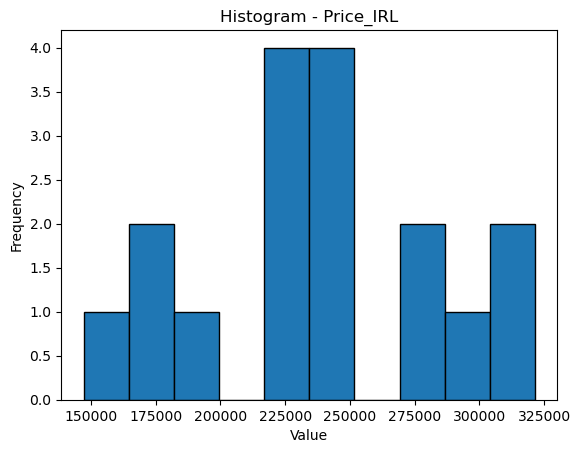

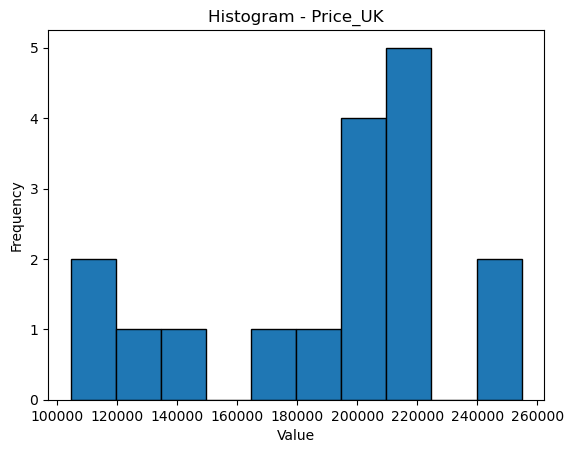

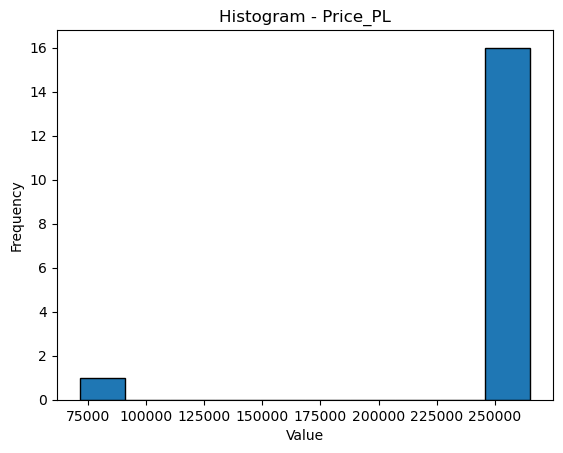

In [32]:
# producing histogram for each of price column
data = merged_df_Year[['Price_IRL','Price_UK','Price_PL']]

for column in data:
    plt.figure()
    plt.hist(merged_df_Year[column], bins=10, edgecolor='black')
    plt.title(f'Histogram - {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

## Kruskal Wallis test

In [34]:
from scipy.stats import kruskal

group1 = merged_df_Year['Price_IRL']
group2 = merged_df_Year['Price_UK']
group3 = merged_df_Year['Price_PL']


grouped_data = [group1, group2, group3]

In [35]:
statistic, p_value = kruskal(*grouped_data)

In [36]:
# significance level
alpha = 0.05 

if p_value < alpha:
    print("The Kruskal-Wallis test indicates significant differences between the groups.")
else:
    print("The Kruskal-Wallis test does not indicate significant differences between the groups.")

The Kruskal-Wallis test indicates significant differences between the groups.


## Non parametric test - Dunn's test

In [37]:
#pip install scikit-posthocs

In [38]:
from scikit_posthocs import posthoc_dunn

# Perform Dunn's test for pairwise comparisons
results = posthoc_dunn([group1, group2, group3])

# Print pairwise comparison results
for i in range(len(results)):
    for j in range(i+1, len(results)):
        group1_index = i
        group2_index = j
        p_value = results.iloc[i, j]
        if p_value < alpha:
            print(f"Group {group1_index} and Group {group2_index} are significantly different.")


Group 0 and Group 1 are significantly different.
Group 1 and Group 2 are significantly different.
